# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Stats 2 Part 3 - Hypothesis Testing

---

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Define null vs alternative hypotheses 
- Explain significance levels
- Explain ways of calculating p-values

### The p-value

$P(Data | H_0)$

The **p-value** is the probability that, **GIVEN THE NULL HYPOTHESIS IS TRUE**, we would observe the current set of data. 



### How to think about hypothesis testing

The p-value is $P(Data | H_0)$. If this probability is below some *significance level* cut-off, then we **reject** the null hypothesis; otherwise, we **fail to reject** it.

There is a rich body of inferential statistics that allows us to calculate this analytically using *parametric methods*, i.e. given certain assumptions. This is the traditional way of doing hypothesis tests.

If we have a model of $H_0$, we can sometimes also calculate this directly with simulations.

So we have two broad strategies for testing hypotheses:

Simulation-based:
- Describe null and alternative hypotheses
- Set significance level alpha
- Define model
- Run simulation
- Calculate p-value
- Compare p-value to alpha

![](./assets/images/Hypothesistestingfigure.png)
_Image from http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html_

Parametric methods:
- Describe null and alternative hypotheses
- Set significance level alpha
- Define distribution
- Calculate test statistic
- Calculate p-value
- Compare p-value to alpha

### Guided practice: hypothesis testing for coin flips

Let's say we want to test whether a coin is rigged to turn up more heads when flipping. What's our null hypothesis? How would we simulate this?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
trials = 100000

# as we increase the sample size, we approach a normal distribution
data = np.random.randint(2, size = (trials,30)) 
data

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1]])

In [12]:
N = np.sum(data, axis = 1) # sum up the number of heads in rows (experiments)
N

array([14, 17, 11, ...,  9, 14, 17])

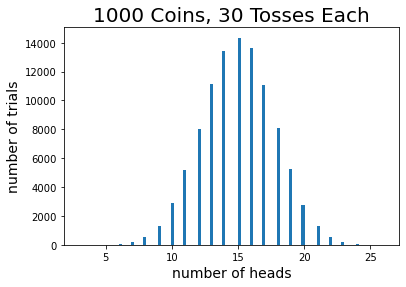

In [17]:
plt.hist(N, bins=100)
plt.title('1000 Coins, 30 Tosses Each', fontsize = 20)
plt.xlabel('number of heads', fontsize = 14)
plt.ylabel('number of trials', fontsize = 14)
plt.show()

Let's say we flipped our real-life coin 30 times, and saw 20 heads. What is the probability of this given $H_0$, which we model with a fair coin? We can use our simulation and simply count the proportion of times we observed a result at least as large as the one we're interested in.

First, let's pick an $\alpha$ **significance level**: at what point do we say a result is improbable enough that we won't believe it happened in a world where $H_0$ is true?

$$\alpha = ?$$

In [5]:
alpha = .05
pval = sum(N >= 20) / trials

print(pval, alpha, pval > alpha)

# This gives ~5% chance, just above our alpha level

0.05001 0.05 True


Do we reject or fail to reject the null hypothesis?

## Demonstration: parametric methods for hypothesis testing

More traditionally, we could define our assumptions about the model and its distribution, and pick an appropriate *test statistic*.

Here, we could use a binomial proportions test statistic. For a largeish number of trials, this gives us a "Z-score" which lies on a normal distribution.

$$ \frac{\hat{p} - p_0}{\sqrt{p_0 (1 - p_0) / n}} $$


In [6]:
import scipy.stats as st

In [7]:
N = 30.              # same as above
p_hat = 20. / N      # observed successes
p_naught = 15. / N   # expected successes

test_stat = (p_hat - p_naught) / np.sqrt(p_naught * (1 - p_naught) / N)

((1 - st.norm.cdf(test_stat))) * 2 # two-tailed

0.067889154861829

### Demo: More hypothesis testing with parametric method

Say we are testing a new drug:

- We randomly select 50 people to be in the placebo control condition and 50 people to recieve the treatment.
- Our sample is selected from the broader, unknown population pool.
- In a parallel world we could have ended up with any random sample from the population pool of 100 people.


### The "null hypothesis"

What is it?

The null hypothesis is, in this example, the hypothesis that there is no difference between placebo and treatment.

**H0:** The measured parameter is equal to a specific value for the population.

The **alternative hypothesis** is the other possible outcome of the experiment: the difference between the placebo and the treatment is real/not zero.

**H1:** The measured parameter is different for the population than the value in the null hypothesis.

Say in our experiment we follow-up with the experimental and control groups:

- 5 out of 50 patients in the control group indicate that their symptoms are better
- 20 out of 50 patients in the experimental group indicate that their symptoms are better

The **p-value** would be the **probability we have this data if the effect of the drug is in fact no better than placebo.**

Let's visuailze this degree of difference, assuming observed differences over many trials are normally distributed.

In [18]:
## these are re-imported here so you don't have to scroll all the way up
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
sns.set(rc={"figure.figsize": (9, 7)})

null_dist = np.random.normal(0, 5, 100)
measured_diff = 15.

In [20]:
null_dist

array([  6.25271367,  -3.84344698,   1.01769718,  -0.10822302,
        -2.79025748,  -1.69559085,  -2.0195162 ,   4.93960918,
        -7.02299832,  -2.85612955,   2.41875091,  -3.22360358,
        -7.9890797 ,  -1.08634888,   0.27422774,   1.0479813 ,
         7.57139515,   3.43919646,   4.41387696,  -1.09743545,
        -6.92395292,   6.31569431,  -9.96371817,   0.562602  ,
        -6.62676974, -12.3713691 ,  -4.08154305,  -7.39912191,
         1.0356778 ,   3.09160782,  -7.64808971,   1.56081401,
         2.36156291,   1.61785173,   7.86486046,  -2.57219996,
         2.76006136,  -0.07003408,   9.78945425,   0.03180433,
         4.82749258,  -6.83024466,  -5.36275015,   0.2540945 ,
        -7.36185553,   5.40942278,   4.29988544,  -1.39164131,
        -0.35234205,   2.08542131,  -6.36075232,  -2.2555839 ,
        -7.7696619 ,  -3.10790495,   1.46551022,   6.19375798,
         3.02563039,   4.29246806,  -3.92244186,   0.60550018,
         1.5124485 ,  -1.71692956,   6.0290458 ,  -1.46

C:\Users\614318\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


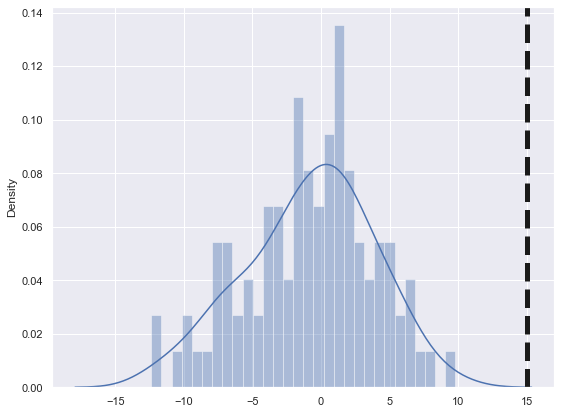

In [25]:
ax = sns.distplot(null_dist, bins =30, kde=True)
ax.axvline(measured_diff, color='k', linestyle='--', lw=5)

plt.show()

### t-tests: calculating the p-value

How do we calculate the **p-value**? For comparing two means (as is the case in this example: the mean difference in symptoms between conditions) we can use the **t-test**.

The p-value is a conversion of the **t-statistic** calculated for our experiment.

<img src="http://sites.nicholas.duke.edu/statsreview/files/2013/09/tstat.jpg">

- The numerator: the difference between **the mean of your sample** and the **hypothesized mean**. Recall that our hypothesized mean is the **null hypothesis H0**

- The denominator: **the standard deviation of your sample measurements** divided by the **square root of your sample size**. 

### But what is the t-statistic?
<img src="http://sites.nicholas.duke.edu/statsreview/files/2013/09/tstat.jpg">

The t-statistic measures the **signal to noise ratio** in our data.

**The signal is our measured difference.** This is our measured mean minus the hypothesized mean **H0**.

**The noise** is the **variation in our data**. This is how much our measurements vary (measured by the standard deviation), with a penalty for smaller sample sizes (the square root of the sample size).

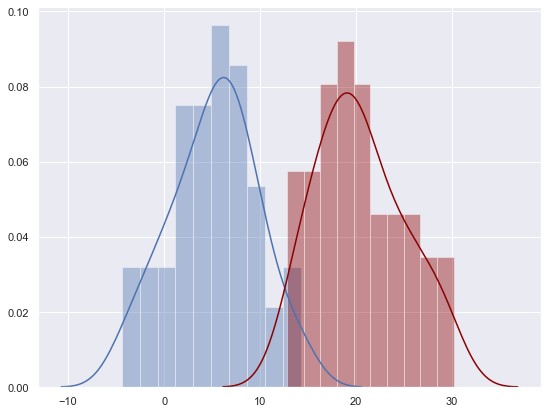

In [12]:
control = np.random.normal(5, 5, 50)
experimental = np.random.normal(20, 5, 50)

ax = sns.distplot(control, bins=10)
sns.distplot(experimental, color='darkred', bins=10, ax=ax)

plt.show()

We set the standard deviation to 5. What if it was higher? 

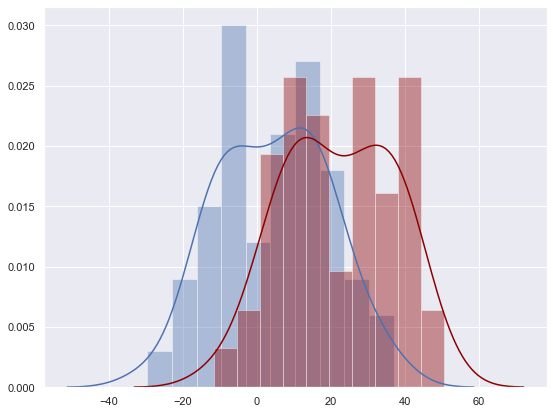

In [13]:
control = np.random.normal(5, 15, 50)
experimental = np.random.normal(20, 15, 50)

ax = sns.distplot(control, bins=10)
sns.distplot(experimental, color='darkred', bins=10, ax=ax)

plt.show()

The likelihood of seeing what we see under the null is in part determined by the underlying variation of the data.



Now, let's calculate the test-statistic:

$$\frac{20 - 5}{\frac{5}{\sqrt{50}}}$$

<img src="http://sites.nicholas.duke.edu/statsreview/files/2013/09/tstat.jpg">

In [14]:
tt = (20 - 5) / (5 / np.sqrt(50))

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t
# Survival Function (also defined as 1 - cdf, but sf is sometimes more accurate).

pval = st.t.sf(np.abs(tt), 50 - 1) * 2  # two-sided pvalue = Prob(abs(t)>tt)

print(f't-statistic = {tt:6.3f} pvalue = {pval:6.4f}')

t-statistic = 21.213 pvalue = 0.0000
